#PREGUNTA NRO:2

In [ ]:
# Importar librerías
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import loadtxt
# semilla para reproductibilidad.
seed = 7
np.random.seed(seed)
# cargando el dataset de heladas_train
dataset = np.loadtxt("heladas_train.csv", delimiter=",")
print("DATASET ORIGINAL")
print(dataset)

DATASET ORIGINAL
[[ 0.309834    0.02480815  0.345034   ...  0.          0.73972603
   0.        ]
 [-0.300064   -0.290056    0.0302427  ...  0.          0.5260274
   1.        ]
 [ 0.364995    0.2048475   0.314858   ...  0.25        0.54520548
   0.        ]
 ...
 [-0.3049795  -0.225064    0.044782   ...  0.          0.52876712
   1.        ]
 [ 0.190102    0.4951385   0.405116   ...  0.          0.61369863
   0.        ]
 [ 0.3550255   0.399845    0.3948195  ...  0.625       0.43287671
   0.        ]]


In [ ]:
# Dividir el dataset en variables input(x) y output(y)
X = dataset[:,0:6]
# Corte del array: [row inicial:rowfinal, datoinicial:datofinal]
Y = dataset[:,6]
print("VALORES DE X")
print(X)
print("VALORES DE Y")
print(Y)


VALORES DE X
[[ 0.309834    0.02480815  0.345034    0.859595    0.          0.73972603]
 [-0.300064   -0.290056    0.0302427   0.169555    0.          0.5260274 ]
 [ 0.364995    0.2048475   0.314858    0.760405    0.25        0.54520548]
 ...
 [-0.3049795  -0.225064    0.044782   -0.370363    0.          0.52876712]
 [ 0.190102    0.4951385   0.405116    0.809982    0.          0.61369863]
 [ 0.3550255   0.399845    0.3948195   0.81043     0.625       0.43287671]]
VALORES DE Y
[0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 

In [ ]:
#El dataset tiene 500 patrones en el training set, de los cuales 400 se usan para entrenar y 100 para validar el modelo
(X,x,Y,y) = train_test_split(X, Y, test_size=0.2,stratify=Y)


In [ ]:
# Crear el modelo
model = Sequential()
model.add(Dense(6, input_shape=(6,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Configurar Aprendizaje del modelo
#Learning rate : 0.01.
sgd = SGD(learning_rate=0.001)
#Optimizador: Gradiente Descendente Estocástico
#Métrica: Accuracy
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
# Fit model
#Neuronas en la capa intermedia: 20
#Batch Size: 25
h= model.fit(X, Y,epochs=20, batch_size=25) 
#epoch: Entrenamientos
#batch_size: Cantidad de Muestras

Epoch 1/20
16/16 [==============================] - 1s 1ms/step - loss: 0.6873 - accuracy: 0.6325
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6325
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6325
Epoch 4/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6325
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.6325
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6325
Epoch 7/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6325
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6325
Epoch 9/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6325
Epoch 10/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6325
Epoch 11/20
16/16 [

In [ ]:
# Evaluar el modelo
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(X)
Z=np.array([[0,89,66,23,94,28.1,0.167,21]])
#Predicciones del Dataset, para comparar con el original Y
#predicciones = model.predict(X, Batch Size: 25, verbose=0)
#print(predicciones)


13/13 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6325
accuracy: 63.25%
[[ 0.304877    0.215022    0.144937    0.609605    0.          0.67945205]
 [-0.08484     0.0800105   0.1649455   0.509755    0.          0.5890411 ]
 [-0.0302443   0.2747655   0.02494505  0.130456    0.          0.4630137 ]
 ...
 [ 0.1300725   0.3202365   0.0997555   0.319626    0.          0.55068493]
 [ 0.329792    0.4451165   0.349762    0.849724    0.25        0.71780822]
 [-0.0201592   0.0101568   0.289929    0.660146    0.25        0.57534247]]


In [ ]:
tl, tc = model.evaluate(x,  y)
print("perdida=" ,tl )
print("presicion=" ,tc )

4/4 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6300
perdida= 0.6452503800392151
presicion= 0.6299999952316284


Text(0.5, 0, 'Iteración')

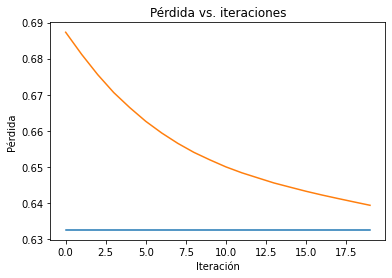

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.plot(h.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
